# Annex: Graphs

In this section, we can find the source code used to do the graphics of the thesis.

In [47]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import interpolate
import numpy as np
from sklearn.metrics import r2_score

#### Plot alpha in function of k

In [48]:
# k_0_S =   [50,75,100,125,150,25,50,75,100,125,150]
# alp_0_S = [20,20,20, 20,20,100,100,100,100,100,100]
# k_0_N =   [0,25,50,75,100,125,150,0,25,50,75,100,125,150,0,25,0]
# alp_0_N = [1,1,1,1,1,1,1,10,10,10,10,10,10,10,20,20,100]
# k_0_line = [160,40,15,0,0,0]
# alp_0_line = [13,20,40,150,155,200]

# k_10_S = [75,100,125,150,50,75,100,125,150,25,50,75,100,125,150]
# alp_10_S = [10,10,10,10,20,20,20,20,20,100,100,100,100,100,100]
# k_10_N = [0,25,50,75,100,125,150,0,25,50,0,25,0]
# alp_10_N = [1,1,1,1,1,1,1,10,10,10,20,20,100]

# k_20_S = [150,75,100,125,150,50,75,100,125,150,25,50,75,100,125,150]
# alp_20_S = [1,10,10,10,10,20,20,20,20,20,100,100,100,100,100,100]
# k_20_N = [0,25,50,75,100,125,0,25,50,0,25,0]
# alp_20_N = [1,1,1,1,1,1,10,10,10,20,20,100]

k_0_S =   [50,75,100,125,150,25,50,75,100,125,150]
alp_0_S = [20,20,20, 20,20,100,100,100,100,100,100]

k_0_line = [160,40,15,0,0,0]
alp_0_line = [13,20,40,150,155,200]

k_10_S = [75,100,125,150,50,75,100,125,150,25,50,75,100,125,150]
alp_10_S = [10,10,10,10,20,20,20,20,20,100,100,100,100,100,100]


k_20_S = [150,75,100,125,150,50,75,100,125,150,25,50,75,100,125,150]
alp_20_S = [1,10,10,10,10,20,20,20,20,20,100,100,100,100,100,100]



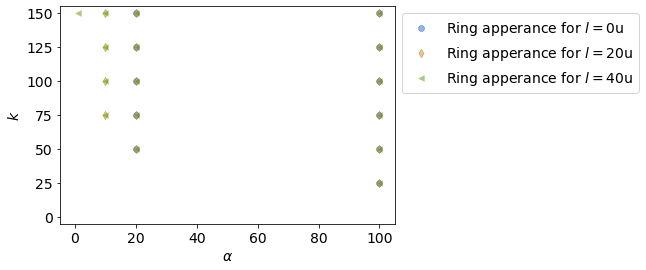

In [149]:
plt.scatter(alp_0_S,k_0_S,label = r"Ring apperance for $l=0$u",marker="o",edgecolors='blue', alpha=0.5,linewidths=0.5)
# plt.scatter(alp_0_N,k_0_N,label = r"No ring for $l=0$u",marker="o",edgecolors='red', alpha=0.5,linewidths=0.5)

plt.scatter(alp_10_S,k_10_S,label = r"Ring apperance for $l=20$u",marker="d",edgecolors='green', alpha=0.5,linewidths=0.5)
# plt.scatter(alp_10_N,k_10_N,label = r"No ring for $l=10$u",marker="d",edgecolors='red', alpha=0.5,linewidths=0.5)

plt.scatter(alp_20_S,k_20_S,label = r"Ring apperance for $l=40$u",marker="<",edgecolors='orange', alpha=0.5,linewidths=0.5)
# plt.scatter(alp_20_N,k_20_N,label = r"No ring for $l=10$u",marker="<",edgecolors='red', alpha=0.5,linewidths=0.5)

plt.xlabel(r"$\alpha$")
plt.ylabel(r"$k$") 
plt.xlim((-5,105)) 
plt.ylim((-5,155)) 
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('./fig',format='pdf',bbox_inches='tight')

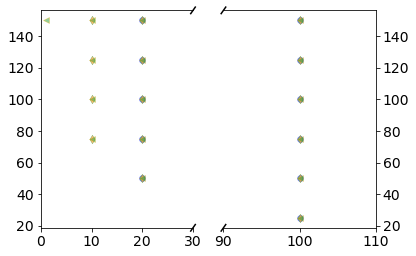

In [147]:
f,(ax,ax2) = plt.subplots(1,2,sharey=True, facecolor='w')

# plot the same data on both axes
ax.scatter(alp_0_S,k_0_S,label = r"Ring apperance for $l=0$u",marker="o",edgecolors='blue', alpha=0.5,linewidths=0.5)
ax2.scatter(alp_0_S,k_0_S,label = r"Ring apperance for $l=0$u",marker="o",edgecolors='blue', alpha=0.5,linewidths=0.5)
# ax.scatter(alp_0_N,k_0_N,label = r"No ring for $l=0$u",marker="o",edgecolors='red', alpha=0.5,linewidths=0.5)
# ax2.scatter(alp_0_N,k_0_N,label = r"No ring for $l=0$u",marker="o",edgecolors='red', alpha=0.5,linewidths=0.5)
ax.scatter(alp_10_S,k_10_S,label = r"Ring apperance for $l=10$u",marker="d",edgecolors='green', alpha=0.5,linewidths=0.5)
ax2.scatter(alp_10_S,k_10_S,label = r"Ring apperance for $l=10$u",marker="d",edgecolors='green', alpha=0.5,linewidths=0.5)
ax.scatter(alp_20_S,k_20_S,label = r"Ring apperance for $l=10$u",marker="<",edgecolors='orange', alpha=0.5,linewidths=0.5)
ax2.scatter(alp_20_S,k_20_S,label = r"Ring apperance for $l=10$u",marker="<",edgecolors='orange', alpha=0.5,linewidths=0.5)


ax.set_xlim(0,30)
ax2.set_xlim(90,110)
# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax2.tick_params(labelright='off',labelleft='off')
ax2.yaxis.tick_right()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

plt.show()

In [49]:
data_path = './Dades-sim1A/'

In [50]:
all_sims_list = list()

for my_file in os.listdir(data_path):
    my_file_df = pd.read_csv(data_path + my_file, sep='\t', header=None)
    if my_file.startswith('r'):
        my_y = my_file_df.loc[0].values
        
        #From file and directory names extract a and k
        my_label = my_file.split('_')[1][:-4]
        my_alp = float((my_label.split('=')[1]).split(',')[0])
        my_k = float((my_label.split('=')[2]).split(')')[0])

         #Get first row of the dataframe.Change number after loc to get other rows 
        my_data_to_plot_df = pd.DataFrame(my_file_df.loc[0]).transpose()
            
        #Add a and k as columns in the dataframe
        my_data_to_plot_df['alp'] = my_alp
        my_data_to_plot_df['k'] = my_k
        my_data_to_plot_df['mesura'] = 0 #radi anell
        
        all_sims_list.append(my_data_to_plot_df) 


        my_data_to_plot_df = pd.DataFrame(my_file_df.loc[5]).transpose()
            
        #Add a and k as columns in the dataframe
        my_data_to_plot_df['alp'] = my_alp
        my_data_to_plot_df['k'] = my_k
        my_data_to_plot_df['mesura'] = 5 #gruix

        #Add dataframe to list
        all_sims_list.append(my_data_to_plot_df) 


        my_data_to_plot_df = pd.DataFrame(my_file_df.loc[6]).transpose()
            
        #Add a and k as columns in the dataframe
        my_data_to_plot_df['alp'] = my_alp
        my_data_to_plot_df['k'] = my_k
        my_data_to_plot_df['mesura'] = 6 #depth

        #Add dataframe to list
        all_sims_list.append(my_data_to_plot_df) 
all_sims_df = pd.concat(all_sims_list)


0.0


C:\Users\frigo\AppData\Local\Temp/ipykernel_24968/3339601148.py:24: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


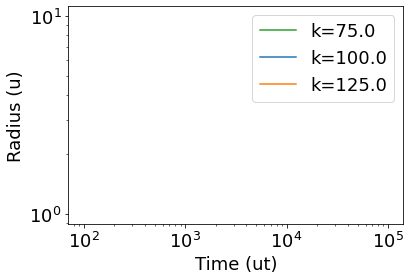

10.0


C:\Users\frigo\AppData\Local\Temp/ipykernel_24968/3339601148.py:24: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


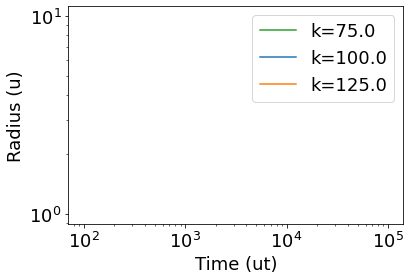

50.0


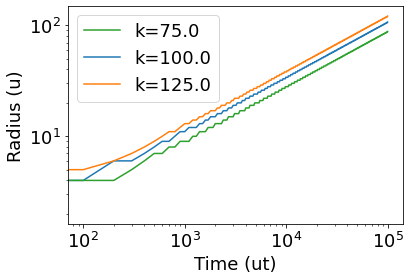

100.0


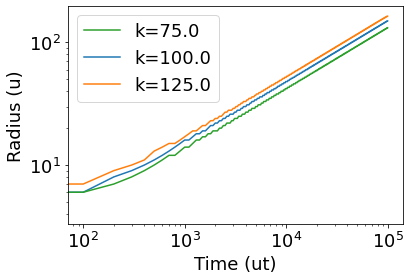

In [61]:
for my_val, my_val_df in all_sims_df.groupby('alp'):
    print(my_val)
    
    for my_index, my_row in my_val_df.iterrows():
        my_k = my_row['k']
        my_alp = my_row['alp']
        my_mesura = my_row['mesura']

        
        my_row_list = list(my_row)[:-3]
        my_x = [100*i for i in range(0, len(my_row_list))]

        # my_x = np.log(my_x)
        # my_row_list = np.log(my_row_list)
        
        # if my_alp>20:
        if my_mesura == 0:
            plt.plot(my_x, my_row_list, label= 'k=' + str(my_k)) #, '+r'$\alpha$='+str(my_alp))
        
    # plt.title('a: ' + str(my_mesura))
    plt.rcParams.update({'font.size': 18})    
    plt.xlabel('Time (ut)')
    plt.xscale('log')
    plt.yscale('log')
    if my_mesura == 0:
        plt.ylabel('Radius (u)')
    if my_mesura == 5:
        plt.ylabel('Width')
    if my_mesura == 6:
        plt.ylabel('Depth')
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [2,0,1]
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

    
    plt.ylabel('Radius (u)')

    #plt.ylim(0,100)#Per a canviar el rang dels eixos
    output_filename = 'LOGLOGalp-vs-k_'+str(my_mesura) + '.pdf'
    output_path = './grafs_alpvsk2/' + output_filename
     
      
    plt.savefig(output_path, format='pdf', bbox_inches='tight')
    plt.show()  
    

In [57]:
def func(x, a, b):
    return [a + b*i for i in x]

def func2(x, a, b, c):
    return [a + b*i + c*i*i for i in x]

k=100.0; alp=50.0
[0.07405458 0.49885369]
[0.0020814  0.00024529]
0.9997829266173831


C:\Users\frigo\AppData\Local\Temp/ipykernel_24968/694360449.py:13: RuntimeWarning: divide by zero encountered in log
  my_row_list = np.log(my_row_list)
C:\Users\frigo\AppData\Local\Temp/ipykernel_24968/694360449.py:13: RuntimeWarning: invalid value encountered in log
  my_row_list = np.log(my_row_list)


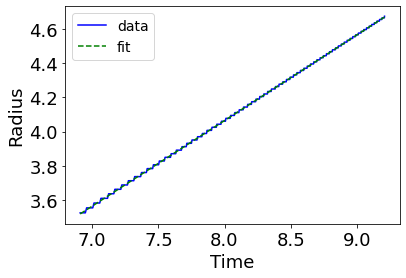

k=125.0; alp=50.0
[0.19752793 0.49896295]
[0.00184365 0.00021727]
0.9998297513830666


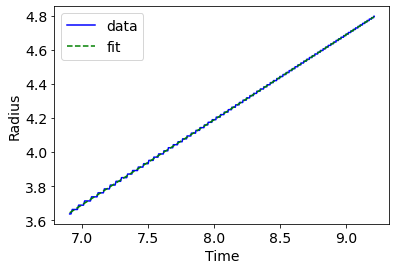

k=75.0; alp=50.0
[-0.12324487  0.49898974]
[0.00252931 0.00029808]
0.9996796536834565


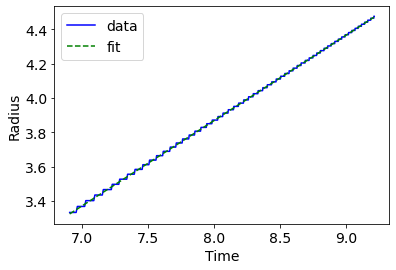

k=100.0; alp=100.0
[0.42116656 0.49856335]
[0.00147334 0.00017363]
0.9998910930043927


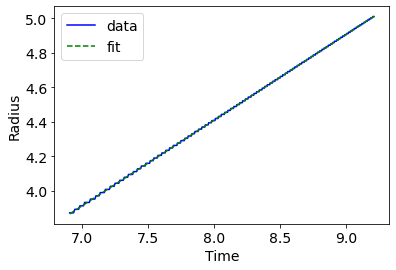

k=125.0; alp=100.0
[0.51569347 0.49831284]
[0.00136973 0.00016142]
0.9999057755579489


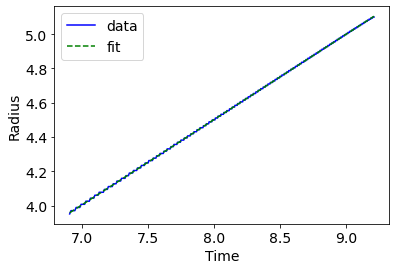

k=75.0; alp=100.0
[0.28925243 0.49883786]
[0.0016822  0.00019825]
0.999858188108875


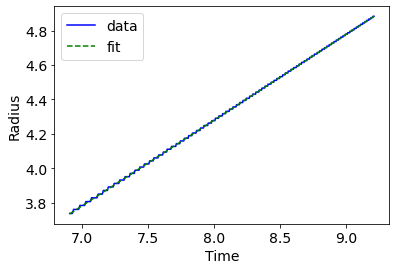

In [58]:
for my_mesura, my_alp_df in all_sims_df.groupby('alp'):
    # print(my_mesura)
    
    for my_index, my_row in my_alp_df.iterrows():
        my_k = my_row['k']
        my_alp = my_row['alp']
        my_mes = my_row['mesura']
        
        inici = 100
        my_row_list = list(my_row)[inici:-3]
        my_x = [10*i for i in range(inici, len(my_row_list)+inici)]

        my_row_list = np.log(my_row_list)
        my_x = np.log(my_x)

        if my_alp>10 and my_mes==0:
            print('k='+str(my_k)+'; alp='+str(my_alp))
            plt.plot(my_x, my_row_list, 'b-', label='data')
            
            popt, pcov = curve_fit(func, my_x, my_row_list)
            
            # residuals = [i - func(i, *popt) for i in my_row_list]
            # ss_res = numpy.sum(residuals**2)
            # ss_tot = numpy.sum((my_row_list-numpy.mean(my_row_list))**2)
            # r_squared = 1 - (ss_res / ss_tot)
            y_pred = func(my_x, *popt)
            r_squared = r2_score(my_row_list, y_pred)
            perr = np.sqrt(np.diag(pcov))
            print(popt)
            print(perr)
            print(r_squared)
            plt.plot(my_x, func(my_x, *popt), 'g--',label='fit')
            plt.rcParams.update({'font.size': 14})
            plt.ylabel('Radius')
            plt.xlabel('Time')
            plt.legend()
            output_filename = 'regressio_'+str(my_k) + '.pdf'
            output_path = './grafs_alpvsk2/' + output_filename
            
            if my_k == 100 and my_alp == 100:
                plt.savefig(output_path, format='pdf', bbox_inches='tight')
            plt.show()  

k=100.0; alp=50.0
[ 2.47072457e+01  1.21899060e-01 -4.12616210e-05]
[1.09749544e-01 4.50409389e-04 4.00970151e-07]
0.9986933453271502


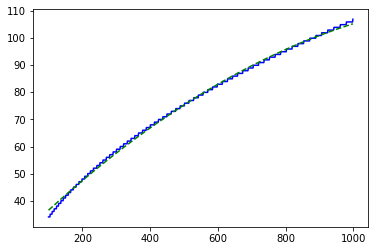

k=125.0; alp=50.0
[ 2.79623727e+01  1.38118699e-01 -4.67834505e-05]
[1.22426626e-01 5.02435812e-04 4.47285893e-07]
0.9987324831282615


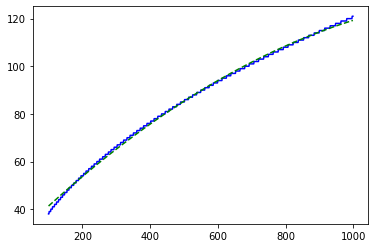

k=75.0; alp=50.0
[ 2.02839976e+01  1.00287574e-01 -3.39959167e-05]
[9.35195525e-02 3.83801908e-04 3.41673849e-07]
0.9985960722746173


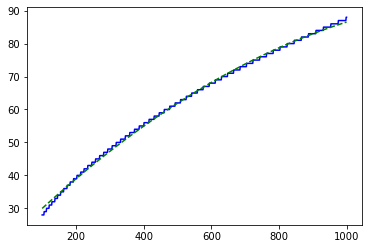

k=100.0; alp=100.0
[ 3.48431635e+01  1.72325739e-01 -5.85661345e-05]
[1.47713055e-01 6.06210682e-04 5.39669897e-07]
0.9988100244376359


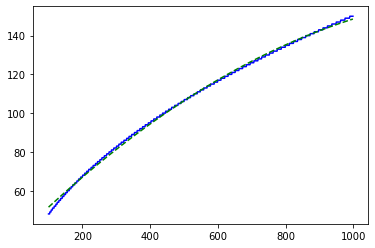

k=125.0; alp=100.0
[ 3.80903333e+01  1.89774070e-01 -6.50488151e-05]
[1.56482957e-01 6.42202146e-04 5.71710761e-07]
0.9988878688952412


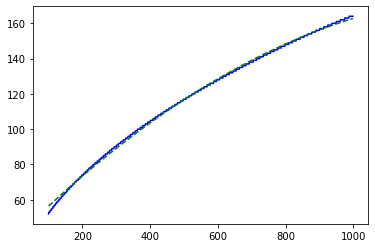

k=75.0; alp=100.0
[ 3.06149765e+01  1.51253904e-01 -5.12656628e-05]
[1.31827318e-01 5.41016021e-04 4.81631337e-07]
0.998773574596778


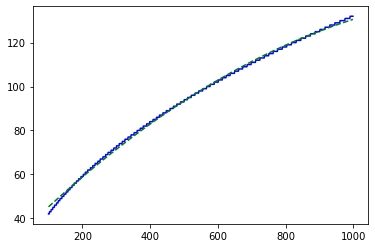

In [58]:
for my_mesura, my_alp_df in all_sims_df.groupby('alp'):
    # print(my_mesura)
    
    for my_index, my_row in my_alp_df.iterrows():
        my_k = my_row['k']
        my_alp = my_row['alp']
        
        inici = 100
        my_row_list = list(my_row)[inici:-3]
        my_x = [i for i in range(inici, len(my_row_list)+inici)]
        if my_alp>10:
            print('k='+str(my_k)+'; alp='+str(my_alp))
            plt.plot(my_x, my_row_list, 'b-', label='data')
            
            popt, pcov = curve_fit(func2, my_x, my_row_list)
            
            # residuals = [i - func(i, *popt) for i in my_row_list]
            # ss_res = numpy.sum(residuals**2)
            # ss_tot = numpy.sum((my_row_list-numpy.mean(my_row_list))**2)
            # r_squared = 1 - (ss_res / ss_tot)
            y_pred = func2(my_x, *popt)
            r_squared = r2_score(my_row_list, y_pred)
            perr = np.sqrt(np.diag(pcov))
            print(popt)
            print(perr)
            print(r_squared)
            plt.plot(my_x, func2(my_x, *popt), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
            plt.show()  

#### Importance of $a$

In [62]:
data_path = './Dades-sim2A/' 

In [63]:
all_sims_list = list()

for my_file in os.listdir(data_path):
    my_file_df = pd.read_csv(data_path + my_file, sep='\t', header=None)
    if my_file.startswith('r'):
        my_y = my_file_df.loc[0].values
        
        #From file and directory names extract a and k
        my_label = my_file.split('_')[1][:-4]
        my_a = float((my_label.split('=')[1]).split(',')[0])
        my_k = float((my_label.split('=')[2]).split(')')[0])

         #Get first row of the dataframe.Change number after loc to get other rows 
        my_data_to_plot_df = pd.DataFrame(my_file_df.loc[0]).transpose()
            
        #Add a and k as columns in the dataframe
        my_data_to_plot_df['a'] = my_a
        my_data_to_plot_df['k'] = my_k
        my_data_to_plot_df['mesura'] = 0 #radi anell
        
        all_sims_list.append(my_data_to_plot_df) 

        my_data_to_plot_df = pd.DataFrame(my_file_df.loc[2]).transpose()
            
        #Add a and k as columns in the dataframe
        my_data_to_plot_df['a'] = my_a
        my_data_to_plot_df['k'] = my_k
        my_data_to_plot_df['mesura'] = 2 #segona forma de mesurar el radi

        all_sims_list.append(my_data_to_plot_df) 

        my_data_to_plot_df = pd.DataFrame(my_file_df.loc[5]).transpose()
            
        #Add a and k as columns in the dataframe
        my_data_to_plot_df['a'] = my_a
        my_data_to_plot_df['k'] = my_k
        my_data_to_plot_df['mesura'] = 5 #gruix

        all_sims_list.append(my_data_to_plot_df) 

        my_data_to_plot_df = pd.DataFrame(my_file_df.loc[6]).transpose()
            
        #Add a and k as columns in the dataframe
        my_data_to_plot_df['a'] = my_a
        my_data_to_plot_df['k'] = my_k
        my_data_to_plot_df['mesura'] = 6 #depth


        #Add dataframe to list
        all_sims_list.append(my_data_to_plot_df) 
all_sims_df = pd.concat(all_sims_list)


0


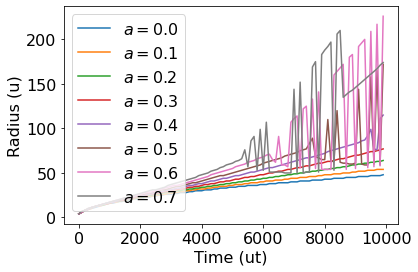

2


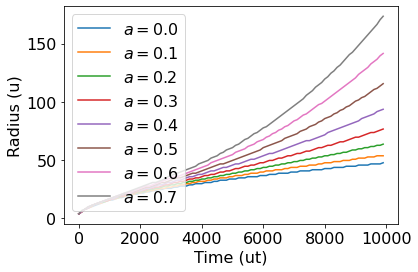

5


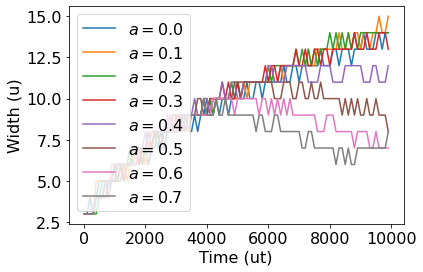

6


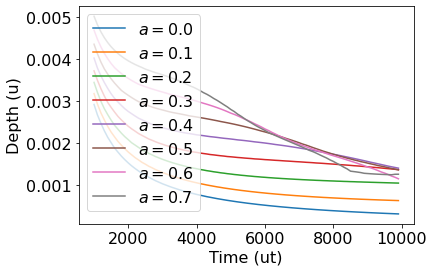

In [66]:
for my_val, my_val_df in all_sims_df.groupby('mesura'):
    print(my_val)
    
    for my_index, my_row in my_val_df.iterrows():
        my_k = my_row['k']
        my_mesura = my_row['mesura']
        my_a = my_row['a']
        
        my_row_list = list(my_row)[0:-3]

        inici = 0
        if my_mesura == 6:
            inici = 10
            my_row_list = list(my_row)[10:-3]

        my_x = [100*i for i in range(inici, len(my_row_list)+inici)]
        
        if my_k == 100:
            plt.plot(my_x, my_row_list, label= r'$a=$'+str(my_a))
        
        
        
    # plt.title('a: ' + str(my_mesura))
    plt.rcParams.update({'font.size': 16})    
    plt.xlabel('Time (ut)')
    if my_mesura == 0  or my_mesura == 2:
        plt.ylabel('Radius (u)')
    if my_mesura == 5:
        plt.ylabel('Width (u)')
    if my_mesura == 6:
        plt.ylabel('Depth (u)')
    plt.legend(loc=2)
    
    #plt.ylim(0,100)#Per a canviar el rang dels eixos
    output_filename = 'a_vs_k_100_'+str(my_mesura) + '.pdf'
    output_path = './grafs_alpvsk2/' + output_filename
     
       
    plt.savefig(output_path, format='pdf', bbox_inches='tight')
    plt.show()  
    

In [114]:
my_row

0          0.029758
1          0.015723
2          0.010973
3          0.008603
4          0.007438
            ...    
98         0.002079
99         0.002118
a          0.700000
k         75.000000
mesura     6.000000
Name: 6, Length: 103, dtype: float64

k=100.0; alp=0.0
[16.77808251  0.3182255 ]
[0.23027997 0.00360805]
0.9900725822192816
k=125.0; alp=0.0
[18.44259259  0.34907407]
[0.26218304 0.00410791]
0.98931351638494
k=75.0; alp=0.0
[14.60216831  0.28021566]
[0.21639803 0.00339054]
0.988709391832822
k=100.0; alp=0.1
[15.15503985  0.39928504]
[0.19216876 0.00301092]
0.9955842508043329
k=125.0; alp=0.1
[16.8628106   0.43486873]
[0.20105571 0.00315016]
0.9959236694229652
k=75.0; alp=0.1
[13.33498593  0.35172293]
[0.16056994 0.00251582]
0.996025117549319
k=100.0; alp=0.2
[12.73040319  0.5089428 ]
[0.09943046 0.00155789]
0.9992696844303094
k=125.0; alp=0.2
[14.20162916  0.55459447]
[0.10868715 0.00170292]
0.9992651259409616
k=75.0; alp=0.2
[11.08123535  0.45283638]
[0.09931329 0.00155605]
0.9990798487957129
k=100.0; alp=0.3
[9.05787623 0.66016174]
[0.24512576 0.00384065]
0.9973669502610193
k=125.0; alp=0.3
[10.10104313  0.7180497 ]
[0.24304271 0.00380802]
0.9978110724159204
k=75.0; alp=0.3
[7.58408345 0.59144398]
[0.21913864 0.00343348]

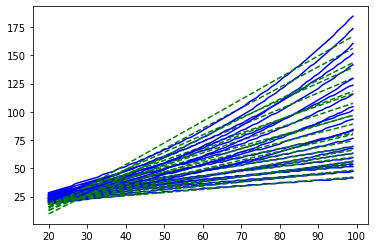

k=100.0; alp=0.0
[ 2.51905594e+01  9.67514217e-01 -2.78204377e-03]
[4.99961419e-01 1.83923159e-02 1.52281615e-04]
0.9981390276599816
k=125.0; alp=0.0
[ 2.71838862e+01  1.08207052e+00 -3.22623845e-03]
[5.20977795e-01 1.91654553e-02 1.58682926e-04]
0.9983219416966059
k=75.0; alp=0.0
[ 2.14890550e+01  8.65758393e-01 -2.56577374e-03]
[5.05911399e-01 1.86112007e-02 1.54093901e-04]
0.9975458411897381
k=100.0; alp=0.1
[ 2.36934388e+01  1.06041920e+00 -2.20041268e-03]
[5.00795627e-01 1.84230043e-02 1.52535703e-04]
0.9988073778388578
k=125.0; alp=0.1
[ 2.68894506e+01  1.14027431e+00 -2.27341890e-03]
[5.41244877e-01 1.99110296e-02 1.64856003e-04]
0.9988251913184153
k=75.0; alp=0.1
[ 2.14630824e+01  9.09504996e-01 -1.73158946e-03]
[4.78097472e-01 1.75879967e-02 1.45622147e-04]
0.9985985691496759
k=100.0; alp=0.2
[ 2.54102220e+01  1.01988745e+00 -1.68222271e-05]
[4.98552478e-01 1.83404576e-02 1.51852379e-04]
0.999269800807728
k=125.0; alp=0.2
[ 2.74570320e+01  1.14663520e+00 -3.14674524e-04]
[5.32

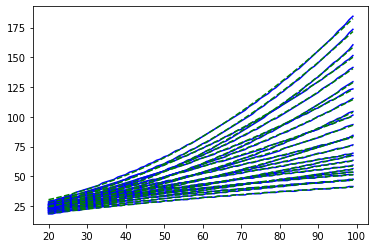

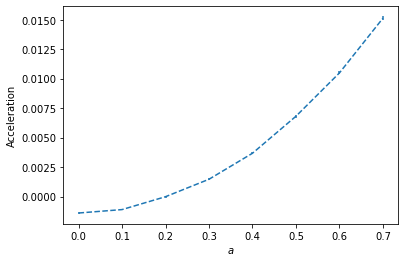

In [4]:
def func(x, a, b):
    return [a + b*i for i in x]

def func2(x, a, b, c):
    return [a + b*i + c*i*i for i in x]

acc = list()
err_acc = list()
a_acc = list()

for my_mesura, my_alp_df in all_sims_df.groupby('mesura'):
    # print(my_mesura)
    
    for my_index, my_row in my_alp_df.iterrows():
        my_k = my_row['k']
        my_mesura = my_row['mesura']
        my_a = my_row['a']
        
        if my_mesura == 2:
            inici = 20
            my_row_list = list(my_row)[inici:-3]
            my_x = [i for i in range(inici, len(my_row_list)+inici)]
            print('k='+str(my_k)+'; alp='+str(my_a))
            plt.plot(my_x, my_row_list, 'b-', label='data')
            
            popt, pcov = curve_fit(func, my_x, my_row_list)
            
            # residuals = [i - func(i, *popt) for i in my_row_list]
            # ss_res = numpy.sum(residuals**2)
            # ss_tot = numpy.sum((my_row_list-numpy.mean(my_row_list))**2)
            # r_squared = 1 - (ss_res / ss_tot)
            y_pred = func(my_x, *popt)
            r_squared = r2_score(my_row_list, y_pred)
            perr = np.sqrt(np.diag(pcov))
            print(popt)
            print(perr)
            print(r_squared)
            plt.plot(my_x, func(my_x, *popt), 'g--',label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
            # plt.show()  
plt.show()
for my_mesura, my_alp_df in all_sims_df.groupby('mesura'):
    # print(my_mesura)
    
    for my_index, my_row in my_alp_df.iterrows():
        my_k = my_row['k']
        my_mesura = my_row['mesura']
        my_a = my_row['a']
        
        if my_mesura == 2:
            inici = 20
            my_row_list = list(my_row)[inici:-3]
            my_x = [i for i in range(inici, len(my_row_list)+inici)]
    
            print('k='+str(my_k)+'; alp='+str(my_a))
            plt.plot(my_x, my_row_list, 'b-', label='data')
            
            popt, pcov = curve_fit(func2, my_x, my_row_list)
            
            # residuals = [i - func(i, *popt) for i in my_row_list]
            # ss_res = numpy.sum(residuals**2)
            # ss_tot = numpy.sum((my_row_list-numpy.mean(my_row_list))**2)
            # r_squared = 1 - (ss_res / ss_tot)
            y_pred = func2(my_x, *popt)
            r_squared = r2_score(my_row_list, y_pred)
            perr = np.sqrt(np.diag(pcov))
            print(2*popt)
            print(2*perr)
            print(r_squared)
            plt.plot(my_x, func2(my_x, *popt), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
            if my_k == 100:
                acc.append(popt[2])
                err_acc.append(perr[2])
                a_acc.append(my_a)
            # plt.show()  
plt.show()
plt.errorbar(a_acc,acc,yerr=err_acc, fmt='--')
plt.xlabel(r'$a$')
plt.ylabel('Acceleration')
plt.show()

#### Choice of $D_b$

In [67]:
data_path = './Dades-sim3A/' 

In [68]:
all_sims_list = list()

for my_file in os.listdir(data_path):
    my_file_df = pd.read_csv(data_path + my_file, sep='\t', header=None)
    if my_file.startswith('r'):
        my_y = my_file_df.loc[0].values
        
        #From file and directory names extract a and k
        my_label = my_file.split('_')[1][:-4]
        my_Db = float((my_label.split('=')[1]).split(',')[0])
        my_k = float((my_label.split('=')[2]).split(')')[0])

         #Get first row of the dataframe.Change number after loc to get other rows 
        my_data_to_plot_df = pd.DataFrame(my_file_df.loc[0]).transpose()
            
        #Add a and k as columns in the dataframe
        my_data_to_plot_df['Db'] = my_Db
        my_data_to_plot_df['k'] = my_k
        my_data_to_plot_df['mesura'] = 0 #radi anell
        
        all_sims_list.append(my_data_to_plot_df) 

        my_data_to_plot_df = pd.DataFrame(my_file_df.loc[5]).transpose()
            
        #Add a and k as columns in the dataframe
        my_data_to_plot_df['Db'] = my_Db
        my_data_to_plot_df['k'] = my_k
        my_data_to_plot_df['mesura'] = 5 #gruix

        all_sims_list.append(my_data_to_plot_df) 

        my_data_to_plot_df = pd.DataFrame(my_file_df.loc[6]).transpose()
            
        #Add a and k as columns in the dataframe
        my_data_to_plot_df['Db'] = my_Db
        my_data_to_plot_df['k'] = my_k
        my_data_to_plot_df['mesura'] = 6 #depth


        #Add dataframe to list
        all_sims_list.append(my_data_to_plot_df) 
all_sims_df = pd.concat(all_sims_list)


0


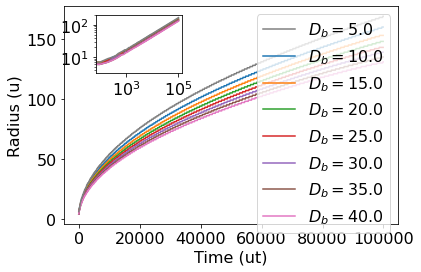

5


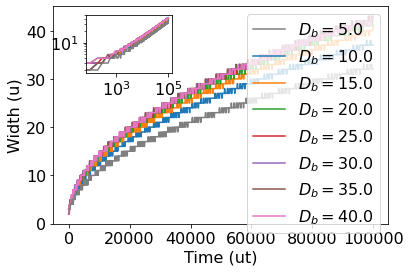

6


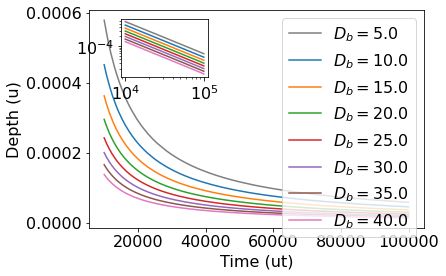

In [73]:
for my_a, my_a_df in all_sims_df.groupby('mesura'):
    print(my_a)
    
    for my_index, my_row in my_a_df.iterrows():
        my_k = my_row['k']
        my_mesura = my_row['mesura']
        my_Db = my_row['Db']
        
        my_row_list = list(my_row)[:-3]

        inici = 0
        if my_mesura == 6:
            inici = 100
            my_row_list = list(my_row)[100:-3]

        my_x = [100* i for i in range(inici, len(my_row_list)+inici)]
        
        if my_k == 100:
            plt.plot(my_x, my_row_list, label= r'$D_b=$'+str(my_Db))
        
    # plt.title('a: ' + str(my_mesura))
    
    plt.rcParams.update({'font.size': 16})
    plt.xlabel('Time (ut)')
    if my_mesura == 0:
        plt.ylabel('Radius (u)')
    if my_mesura == 5:
        plt.ylabel('Width (u)')
    if my_mesura == 6:
        plt.ylabel('Depth (u)')
    
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [7,0,1,2,3,4,5,6]
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

    a = plt.axes([.2, .65, .2, .2])
    for my_index, my_row in my_a_df.iterrows():
        my_k = my_row['k']
        my_mesura = my_row['mesura']
        my_Db = my_row['Db']
        
        my_row_list = list(my_row)[:-3]

        inici = 0
        if my_mesura == 6:
            inici = 100
            my_row_list = list(my_row)[100:-3]

        my_x = [100* i for i in range(inici, len(my_row_list)+inici)]
        
        if my_k == 100:
            
            plt.plot(my_x, my_row_list)
            plt.yscale('log')
            plt.xscale('log')
    
    #plt.ylim(0,100)#Per a canviar el rang dels eixos
    output_filename = 'Db-vs-k_100'+'_'+str(my_mesura) + '.pdf'
    output_path = './grafs_alpvsk2/' + output_filename
     

       
    plt.savefig(output_path, format='pdf', bbox_inches='tight')
    plt.show()  
    

### Introduction of the Succinate

#### Choice of $\gamma$

In [96]:
data_path = './Dades-sim1B/' 

In [97]:
all_sims_list = list()

for my_file in os.listdir(data_path):
    my_file_df = pd.read_csv(data_path + my_file, sep='\t', header=None)
    if my_file.startswith('r'):
        my_y = my_file_df.loc[0].values
        
        #From file and directory names extract a and k
        my_label = my_file.split('_')[1][:-4]
        my_nf = float((my_label.split('=')[1]).split(',')[0])
        my_gam = float((my_label.split('=')[2]).split(')')[0])

         #Get first row of the dataframe.Change number after loc to get other rows 
        my_data_to_plot_df = pd.DataFrame(my_file_df.loc[0]).transpose()
            
        #Add a and k as columns in the dataframe
        my_data_to_plot_df['nf'] = my_nf
        my_data_to_plot_df['gam'] = my_gam
        my_data_to_plot_df['mesura'] = 0 #radi anell
        
        all_sims_list.append(my_data_to_plot_df) 

        my_data_to_plot_df = pd.DataFrame(my_file_df.loc[5]).transpose()
            
        #Add a and k as columns in the dataframe
        my_data_to_plot_df['nf'] = my_nf
        my_data_to_plot_df['gam'] = my_gam
        my_data_to_plot_df['mesura'] = 5 #gruix

        all_sims_list.append(my_data_to_plot_df) 

        my_data_to_plot_df = pd.DataFrame(my_file_df.loc[6]).transpose()
            
        #Add a and k as columns in the dataframe
        my_data_to_plot_df['nf'] = my_nf
        my_data_to_plot_df['gam'] = my_gam
        my_data_to_plot_df['mesura'] = 6 #depth


        #Add dataframe to list
        all_sims_list.append(my_data_to_plot_df) 
all_sims_df = pd.concat(all_sims_list)


0


C:\Users\frigo\AppData\Local\Temp/ipykernel_24968/1844579240.py:49: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


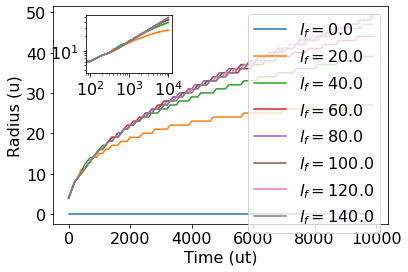

5


C:\Users\frigo\AppData\Local\Temp/ipykernel_24968/1844579240.py:49: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


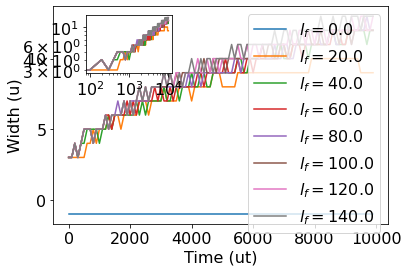

6


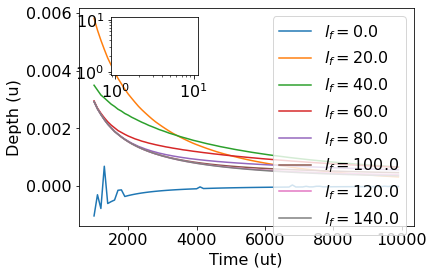

In [98]:
for my_a, my_a_df in all_sims_df.groupby('mesura'):
    print(my_a)
    
    for my_index, my_row in my_a_df.iterrows():
        my_nf = my_row['nf']
        my_mesura = my_row['mesura']
        my_gam = my_row['gam']
        
        my_row_list = list(my_row)[:-3]

        inici = 0
        if my_mesura == 6:
            inici = 10
            my_row_list = list(my_row)[10:-3]

        my_x = [100*i for i in range(inici, len(my_row_list)+inici)]
        
        if my_gam == 0.0001:
            plt.plot(my_x, my_row_list, label= r'$l_f=$'+str(2*my_nf))
        
    # plt.title('a: ' + str(my_mesura))

    plt.rcParams.update({'font.size': 16})   
    plt.xlabel('Time (ut)')
    if my_mesura == 0:
        plt.ylabel('Radius (u)')
    if my_mesura == 5:
        plt.ylabel('Width (u)')
    if my_mesura == 6:
        plt.ylabel('Depth (u)')
    plt.legend()
    a = plt.axes([.2, .65, .2, .2])
    for my_index, my_row in my_a_df.iterrows():
        my_nf = my_row['nf']
        my_mesura = my_row['mesura']
        my_gam = my_row['gam']
        
        my_row_list = list(my_row)[:-3]

        inici = 0
        if my_mesura == 6:
            inici = 100
            my_row_list = list(my_row)[100:-3]

        my_x = [100*i for i in range(inici, len(my_row_list)+inici)]
        
        if my_gam == 0.0004:            
            plt.plot(my_x, my_row_list)
            plt.yscale('log')
            plt.xscale('log')


    #plt.ylim(0,100)#Per a canviar el rang dels eixos
    output_filename = 'FIGn0-vs-gam_0.0001'+'_'+str(my_mesura) + '.pdf'
    output_path = './grafs_simB/' + output_filename
     
       
    plt.savefig(output_path, format='pdf', bbox_inches='tight')
    plt.show()  

#### Initial succinate

In [84]:
data_path = './Dades-sim2B/' 

In [85]:
all_sims_list = list()

for my_file in os.listdir(data_path):
    my_file_df = pd.read_csv(data_path + my_file, sep='\t', header=None)
    if my_file.startswith('r'):
        my_y = my_file_df.loc[0].values
        
        #From file and directory names extract a and k
        my_label = my_file.split('_')[1][:-4]
        my_nf = float((my_label.split('=')[1]).split(',')[0])
        my_f0 = float((my_label.split('=')[2]).split(')')[0])

        #Get first row of the dataframe.Change number after loc to get other rows 
        my_data_to_plot_df = pd.DataFrame(my_file_df.loc[0]).transpose()
            
        #Add a and k as columns in the dataframe
        my_data_to_plot_df['nf'] = my_nf
        my_data_to_plot_df['f0'] = my_f0
        my_data_to_plot_df['mesura'] = 0 #radi anell
        
        all_sims_list.append(my_data_to_plot_df) 

        my_data_to_plot_df = pd.DataFrame(my_file_df.loc[5]).transpose()
            
        #Add a and k as columns in the dataframe
        my_data_to_plot_df['nf'] = my_nf
        my_data_to_plot_df['f0'] = my_f0
        my_data_to_plot_df['mesura'] = 5 #gruix

        all_sims_list.append(my_data_to_plot_df) 

        my_data_to_plot_df = pd.DataFrame(my_file_df.loc[6]).transpose()
            
        #Add a and k as columns in the dataframe
        my_data_to_plot_df['nf'] = my_nf
        my_data_to_plot_df['f0'] = my_f0
        my_data_to_plot_df['mesura'] = 6 #depth


        #Add dataframe to list
        all_sims_list.append(my_data_to_plot_df) 
all_sims_df = pd.concat(all_sims_list)

0


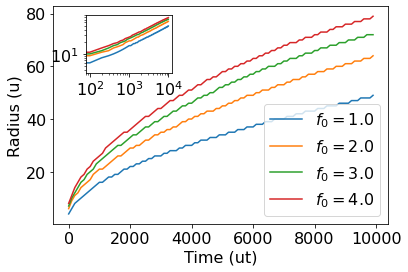

5


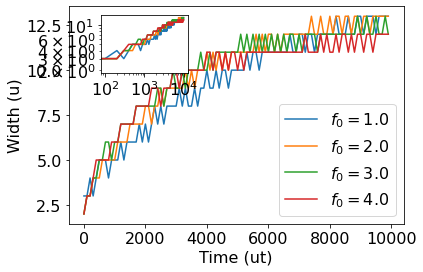

6


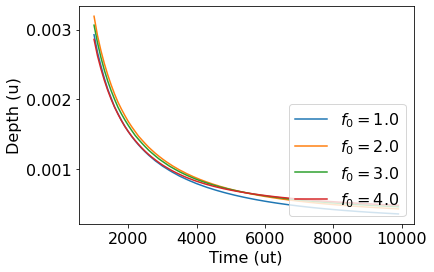

In [86]:
for my_a, my_a_df in all_sims_df.groupby('mesura'):
    print(my_a)
    
    for my_index, my_row in my_a_df.iterrows():
        my_nf = my_row['nf']
        my_mesura = my_row['mesura']
        my_f0 = my_row['f0']
        
        my_row_list = list(my_row)[:-3]

        inici = 0
        if my_mesura == 6:
            inici = 10
            my_row_list = list(my_row)[10:-3]

        my_x = [100*i for i in range(inici, len(my_row_list)+inici)]
        
        if my_nf == 70:
            if  0<my_f0 <5:
                plt.plot(my_x, my_row_list, label= r'$f_0=$'+str(my_f0))
        
    # plt.title('a: ' + str(my_mesura))
    plt.rcParams.update({'font.size': 16})    
    plt.xlabel('Time (ut)')
    if my_mesura == 0:
        plt.ylabel('Radius (u)')
    if my_mesura == 5:
        plt.ylabel('Width (u)')
    if my_mesura == 6:
        plt.ylabel('Depth (u)')
    plt.legend(loc=4)
    if my_mesura != 6:
        a = plt.axes([.2, .65, .2, .2])
    for my_index, my_row in my_a_df.iterrows():
        my_nf = my_row['nf']
        my_mesura = my_row['mesura']
        my_f0 = my_row['f0']
        
        my_row_list = list(my_row)[:-3]

        inici = 0
        if my_mesura == 6:
            inici = 100
            my_row_list = list(my_row)[100:-3]

        my_x = [100*i for i in range(inici, len(my_row_list)+inici)]
        
        if my_nf == 70 and 0<my_f0 <5 and my_mesura != 6:          
            plt.plot(my_x, my_row_list)
            plt.yscale('log')
            plt.xscale('log')   
    
    #plt.ylim(0,100)#Per a canviar el rang dels eixos
    output_filename = 'FIGf0_vs_nf_70'+'_'+str(my_mesura) + '.pdf'
    output_path = './grafs_simB/' + output_filename
     
       
    plt.savefig(output_path, format='pdf', bbox_inches='tight')
    plt.show()  

#### Density profiles - No succinate

In [87]:
data_path = './Vídeos/alp/' 

all_sims_list = list()


for my_file in os.listdir(data_path):
    my_file_df = pd.read_csv(data_path + my_file, sep='\t', header=None)
    

    my_label = my_file.split(')')[1][:]
    my_time = float((my_label.split('=')[1]))

    my_data_to_plot_df = pd.DataFrame(my_file_df.loc[250]).transpose()
    my_data_to_plot_df['time'] = my_time

    all_sims_list.append(my_data_to_plot_df)
all_sims_df = pd.concat(all_sims_list)

In [159]:

my_y = all_sims_df.loc[all_sims_df['time']==1000]
my_x = [i for i in range(-250,251)]

1000


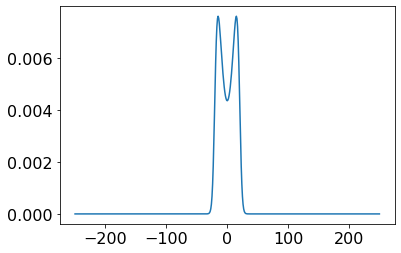

2000


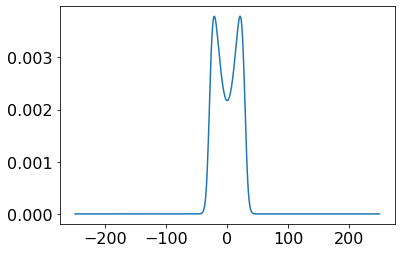

4000


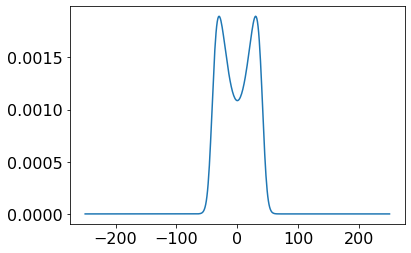

9000


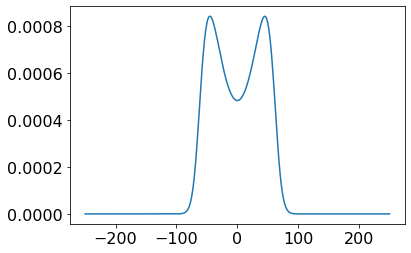

20000


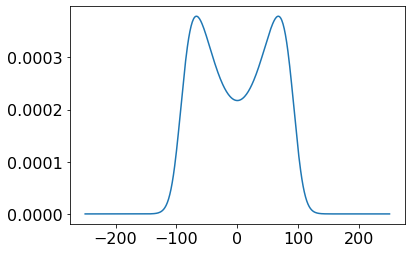

50000


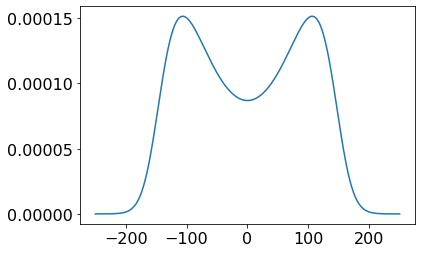

In [9]:
my_x = [i for i in range(-250,251)]
for i in [1000,2000,4000,9000,20000,50000]:
    for my_index, my_row in all_sims_df.loc[all_sims_df['time']==i].iterrows():
        my_y = list(my_row)[1:-2]
        print(i)
        plt.plot(my_x,my_y)

        plt.show()

5000
20000
100000


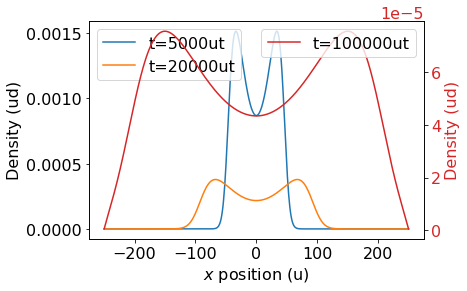

In [88]:
my_x = [i for i in range(-250,251)]
fig, ax1 = plt.subplots()
plt.rcParams.update({'font.size': 16})    
for i in [5000,20000,100000]:
    for my_index, my_row in all_sims_df.loc[all_sims_df['time']==i].iterrows():
        my_y = list(my_row)[1:-2]
        print(i)
        if i == 5000 or i == 20000:
            ax1.plot(my_x,my_y,label = 't='+str(i)+'ut')
        if i == 20000:
            ax2 = ax1.twinx()
        if i == 100000:
            color = 'tab:red'
            ax2.set_ylabel(r'Density (ud)', color=color)
            ax2.plot(my_x,my_y,color=color,label='t='+str(i)+'ut')
            ax2.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel(r'$x$ position (u)')
ax1.set_ylabel('Density (ud)')
ax1.legend(loc=2)
ax2.legend(loc=1)


output_filename = 'obs_prof' + '.pdf'
output_path = './figs/' + output_filename    
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.show()


In [89]:
def prof (x,t):
    M0 = 1
    U = 1
    return M0**2 /8 * (1/np.cosh(M0*(x-U*t)/4))**2


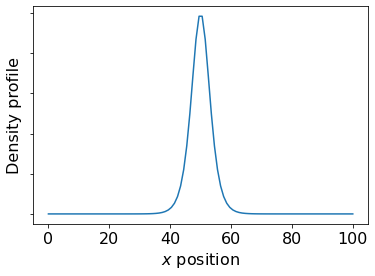

In [90]:
my_x = np.linspace(0, 100, 100)
plt.plot(my_x,prof(my_x,50))
plt.rcParams.update({'font.size': 16})    
plt.xlabel(r'$x$ position')
plt.ylabel('Density profile')
ax = plt.gca()
# ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])


output_filename = 'exp_prof' + '.pdf'
output_path = './figs/' + output_filename
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.show()


In [91]:
def prof_s (x):
    M0 = 100

    return M0**2 /6 * (np.exp(-M0/(12)*x)/(2*np.cosh(M0/(6*x**(3/2)))))

C:\Users\frigo\AppData\Local\Temp/ipykernel_24968/242829034.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.axes.xaxis.set_ticklabels([0,0,20,40,60,80])


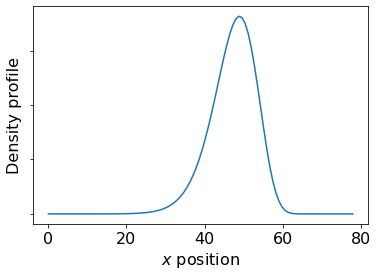

In [92]:
my_x = np.linspace(0.1, 4, 100)
plt.plot(-my_x*10,prof_s(my_x))
plt.xlabel(r'$x$ position')
plt.ylabel('Density profile')
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([0,0,20,40,60,80])
ax.axes.yaxis.set_ticklabels([])
output_filename = 'exp_prof_s' + '.pdf'
output_path = './figs/' + output_filename    
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.show()

#### Density profiles - Succinate

In [93]:
data_path = './sim3Bb/' 

all_sims_list = list()


for my_file in os.listdir(data_path): 
    my_file_df = pd.read_csv(data_path + my_file, sep='\t', header=None)
    if my_file.startswith('p'):

        my_label = my_file.split(')')[1][:]
        my_label1 = my_file.split(')')[0][:]
        my_a = float((my_label1.split('=')[3]))
        my_time = float((my_label.split('=')[1]))

        my_data_to_plot_df = pd.DataFrame(my_file_df.loc[250]).transpose()
        my_data_to_plot_df['time'] = my_time
        my_data_to_plot_df['a'] = my_a

        all_sims_list.append(my_data_to_plot_df)
all_sims_df = pd.concat(all_sims_list)

1000
a=0.0


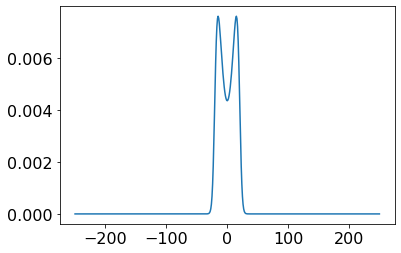

1000
a=0.1


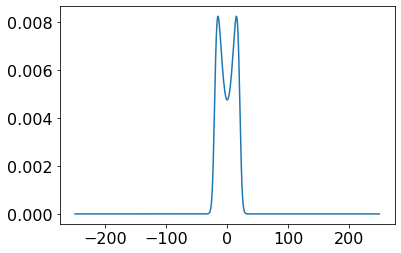

1000
a=0.2


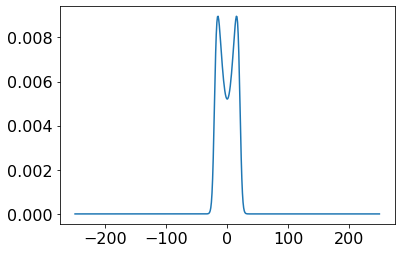

1000
a=0.3


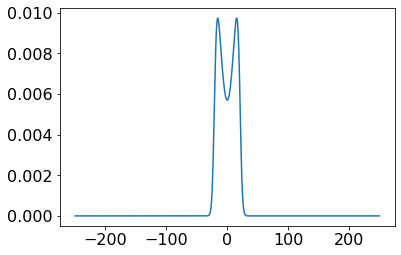

1000
a=0.4


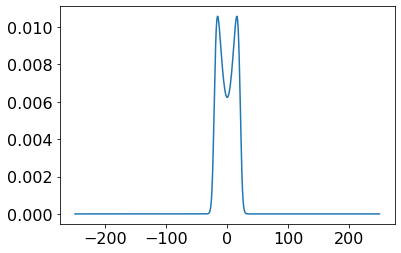

2000
a=0.0


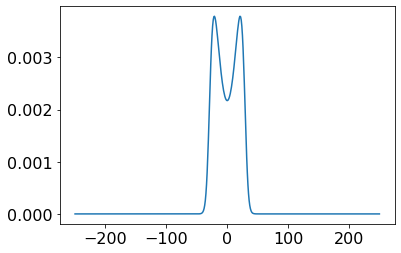

2000
a=0.1


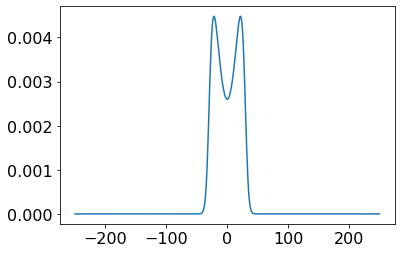

2000
a=0.2


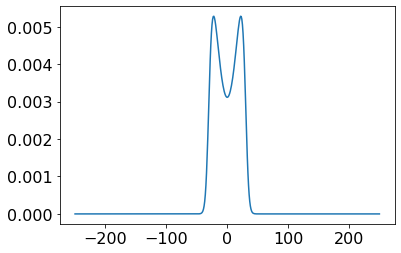

2000
a=0.3


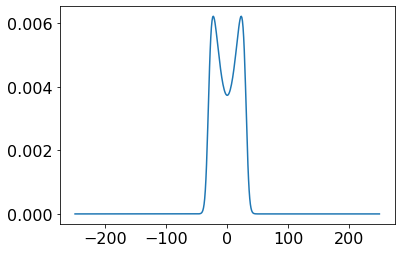

2000
a=0.4


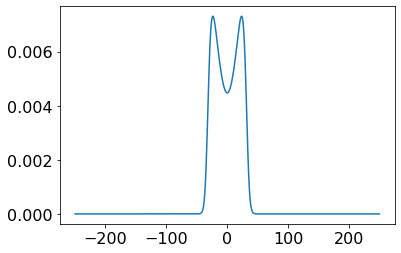

4000
a=0.0


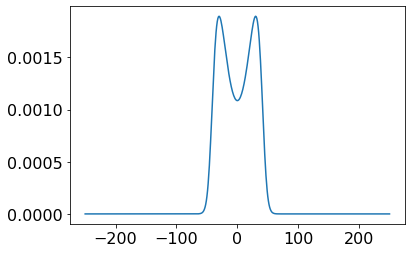

4000
a=0.1


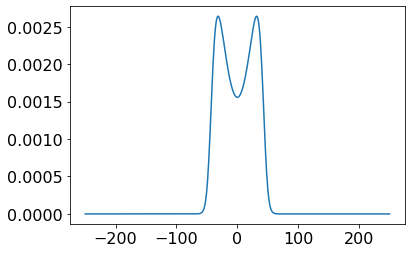

4000
a=0.2


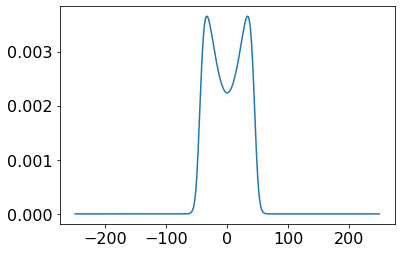

4000
a=0.3


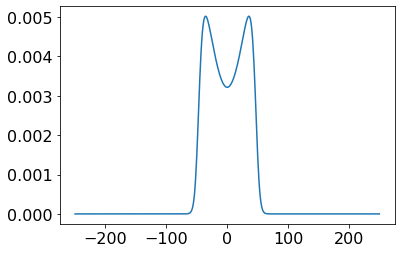

4000
a=0.4


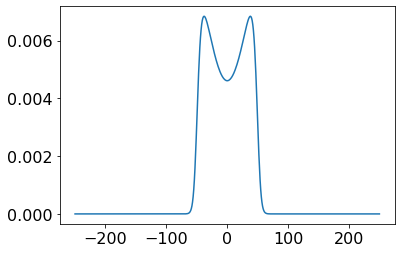

9000
a=0.0


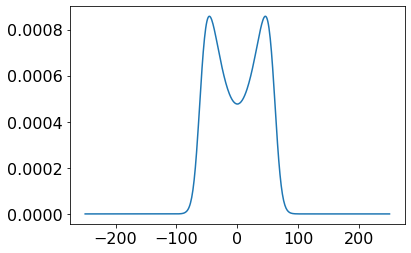

9000
a=0.1


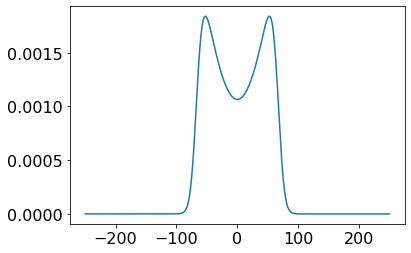

9000
a=0.2


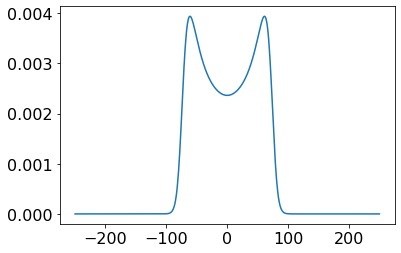

9000
a=0.3


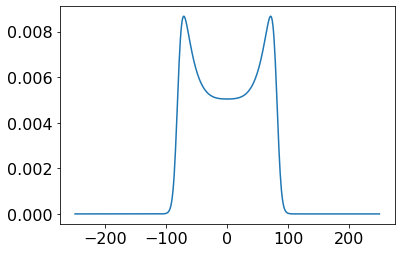

9000
a=0.4


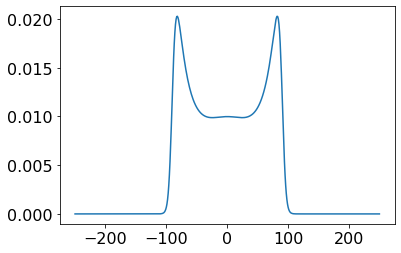

20000
a=0.0


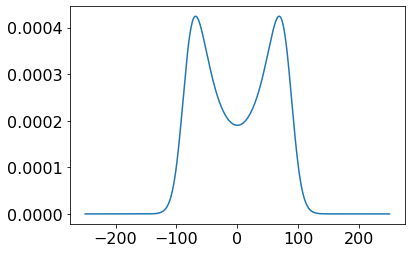

20000
a=0.1


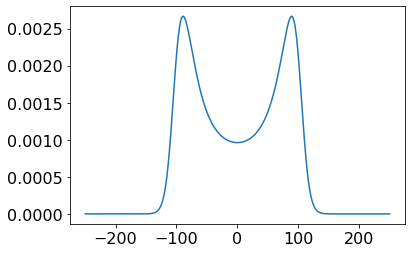

20000
a=0.2


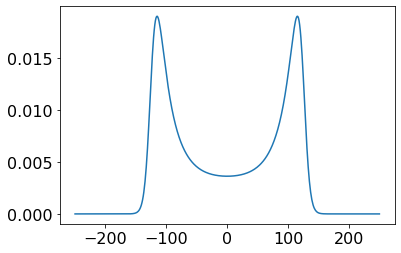

20000
a=0.3


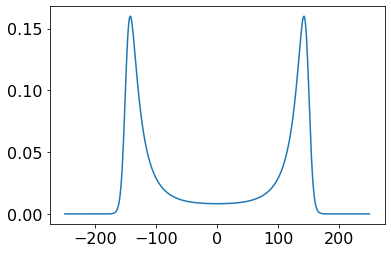

20000
a=0.4


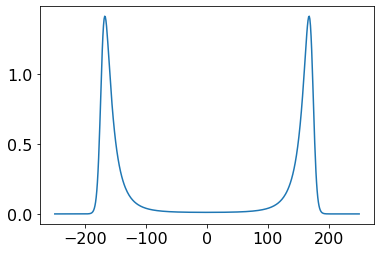

In [212]:
my_x = [i for i in range(-250,251)]
for i in [1000,2000,4000,9000,20000,50000]:
    for my_index, my_row in all_sims_df.loc[all_sims_df['time']==i].iterrows():
        my_y = list(my_row)[1:-3]
        print(i)
        print('a='+str(my_row['a']))
        plt.plot(my_x,my_y)


        plt.show()

5000
5000
5000
5000
5000
20000
20000
20000
20000
20000
40000
40000
40000
40000
40000


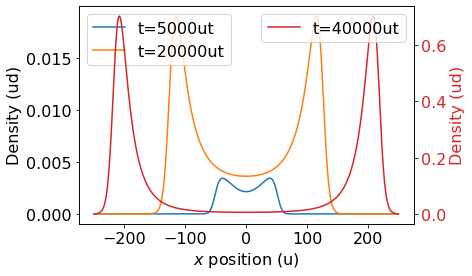

In [94]:
my_x = [i for i in range(-250,251)]
fig, ax1 = plt.subplots()
plt.rcParams.update({'font.size': 16})    
for i in [5000,20000,40000]:
    for my_index, my_row in all_sims_df.loc[all_sims_df['time']==i].iterrows():
        my_y = list(my_row)[1:-3]
        my_a = my_row['a']
        print(i)

        if my_a == 0.2:
            if i == 5000 or i == 20000:
                ax1.plot(my_x,my_y,label = 't='+str(i)+'ut')
            if i == 20000:
                ax2 = ax1.twinx()
            if i == 40000:
                color = 'tab:red'
                ax2.set_ylabel(r'Density (ud)', color=color)
                ax2.plot(my_x,my_y,color=color,label='t='+str(i)+'ut')
                ax2.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel(r'$x$ position (u)')
ax1.set_ylabel('Density (ud)')
ax1.legend(loc=2)
ax2.legend(loc=1)


output_filename = 'obs_prof_suc_a=0.2' + '.pdf'
output_path = './figs/' + output_filename    
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.show()

In [33]:
data_path = './Vídeos/a_2/' 

all_sims_list = list()


for my_file in os.listdir(data_path): 
    my_file_df = pd.read_csv(data_path + my_file, sep='\t', header=None)
    if my_file.startswith('p'):

        my_label = my_file.split(')')[1][:]
        my_label1 = my_file.split(',')[0][:]
        my_a = float((my_label1.split('=')[1]))
        my_time = float((my_label.split('=')[1]))

        my_data_to_plot_df = pd.DataFrame(my_file_df.loc[250]).transpose()
        my_data_to_plot_df['time'] = my_time
        my_data_to_plot_df['a'] = my_a

        all_sims_list.append(my_data_to_plot_df)
all_sims_df = pd.concat(all_sims_list)

In [156]:
my_a

0.7

10000
10000
10000
10000
10000
10000


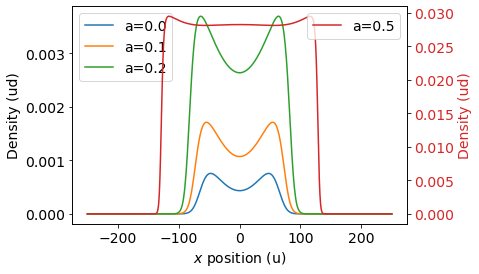

In [40]:
my_x = [i for i in range(-250,251)]
fig, ax1 = plt.subplots()
plt.rcParams.update({'font.size': 14})    
for i in [10000]:
    for my_index, my_row in all_sims_df.loc[all_sims_df['time']==i].iterrows():
        my_y = list(my_row)[1:-3]
        my_a = my_row['a']
        print(i)

        if my_a == 0 or my_a == 0.1 or my_a ==0.2:
            ax1.plot(my_x,my_y,label = 'a='+str(my_a))
        if my_a == 0.2:
            ax2 = ax1.twinx()
        if my_a == 0.5:
            color = 'tab:red'
            ax2.set_ylabel(r'Density (ud)', color=color)
            ax2.plot(my_x,my_y,color=color,label='a='+str(my_a))
            ax2.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel(r'$x$ position (u)')
ax1.set_ylabel('Density (ud)')
ax1.legend(loc=2)
ax2.legend(loc=1)


output_filename = 'prof_a' + '.pdf'
output_path = './figs/' + output_filename    
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.show()